In [1]:
#import the packages
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import ta

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [6]:
today = date.today()
ticker1 = 'AAPL' 
start_date = '2019-01-02'
end = today
df = pdr.get_data_yahoo(ticker1, start=start_date, end=today)
df['RSI'] = ta.momentum.rsi(df.Close, window=14)
stochastic = ta.momentum.StochasticOscillator(df.High, df.Low, df.Close, window=14)
df['STOCH%K'] = stochastic.stoch()
df['STOCH%D'] = stochastic.stoch_signal()
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,RSI,STOCH%K,STOCH%D
Date,,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.708588,148158800,NaN,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,33.952549,365248800,NaN,NaN,NaN
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.401955,234428400,NaN,NaN,NaN
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.323162,219111200,NaN,NaN,NaN
2019-01-08,37.389999,37.955002,37.130001,37.687500,35.996521,164101200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-01-03,243.360001,244.179993,241.889999,243.360001,243.360001,40244100,45.341608,8.424471,17.466839
2025-01-06,244.309998,247.330002,243.199997,245.000000,245.000000,45045600,48.122650,17.396022,12.308507
2025-01-07,242.979996,245.550003,241.350006,242.210007,242.210007,40856000,44.019305,4.586670,10.135721


In [7]:
df1 = df.iloc[-960:].copy()
df1

,Open,High,Low,Close,Adj Close,Volume,RSI,STOCH%K,STOCH%D
Date,,,,,,,,,
2021-03-18,122.879997,123.180000,120.320000,120.529999,118.036995,121229700,42.246207,34.532366,59.232613
2021-03-19,119.900002,121.430000,119.680000,119.989998,117.508141,185549500,41.490129,30.215812,44.364505
2021-03-22,120.330002,123.870003,120.260002,123.389999,120.837830,111912300,47.822043,65.213432,43.320537
2021-03-23,123.330002,124.239998,122.139999,122.540001,120.005402,95467100,46.468148,57.493193,50.974146
2021-03-24,122.820000,122.900002,120.070000,120.089996,117.606102,88530500,42.714404,35.240658,52.649095
...,...,...,...,...,...,...,...,...,...
2025-01-03,243.360001,244.179993,241.889999,243.360001,243.360001,40244100,45.341608,8.424471,17.466839
2025-01-06,244.309998,247.330002,243.199997,245.000000,245.000000,45045600,48.122650,17.396022,12.308507
2025-01-07,242.979996,245.550003,241.350006,242.210007,242.210007,40856000,44.019305,4.586670,10.135721


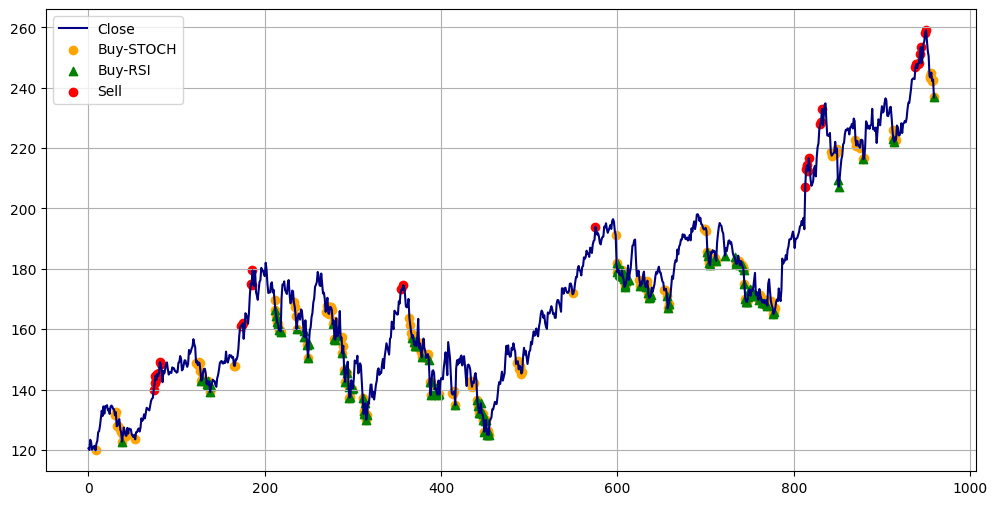

In [14]:
import pylab as pl
from matplotlib import collections  as mc

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

#lista scatter buy
arrayRSI = []
for x in range(len(df1)):
    if df1.RSI[x] >= 40:
        arrayRSI.append(np.nan)
    else:
        arrayRSI.append(df1.Close[x])

arraySTOCH = [np.nan if stoch >= 25 else close for stoch, close in zip(df1['STOCH%K'], df1.Close)]
sellRSI = []
for x in range(len(df1)):
    if df1.RSI[x] <= 75:
        sellRSI.append(np.nan)
    else:
        sellRSI.append(df1.Close[x])


XX = [x for x in range(len(df1))]
yt1 = [x for x in df1.Close]

pl.plot(XX, yt1, color = 'navy', label='Close')
pl.scatter(XX, arraySTOCH, color = 'orange', label='Buy-STOCH', marker='o')
pl.scatter(XX, arrayRSI, color = 'green', label='Buy-RSI', marker='^')
pl.scatter(XX, sellRSI, color = 'red', label='Sell')
pl.legend()
pl.grid(True)
pl.show();